# Machine Intelligence 1

$\Large{Group: ALT}$  

## Convolutional neural networks
### Building models for recognizing digits

__Question 1__

In [2]:
import math
import numpy as np
import itertools
from tabulate import tabulate
import matplotlib.pyplot as plt
import time
import random
from numpy import linalg as LA
plt.style.use('dark_background')


In [3]:
import tensorflow as tf
from keras.datasets import mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0 #convert to floating point

(n_im_train,dim_x,dim_y) = X_train.shape
(n_im_test,dim_x,dim_y) = X_test.shape

yo_train = tf.keras.backend.one_hot(y_train,10)
yo_test = tf.keras.backend.one_hot(y_test,10)



In [4]:
X_train_r = np.reshape(X_train,(n_im_train,-1))
X_test_r = np.reshape(X_test,(n_im_test,-1))
print("Shape of the training set: ",X_train_r.shape,"\nShape of the test set: ",X_test_r.shape)

Shape of the training set:  (60000, 784) 
Shape of the test set:  (10000, 784)


In [5]:
def plot_loss_accuracy(history,title_loss,title_acc):
    plt.figure(figsize=(10, 10))
    plt.subplot(211)
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title_loss)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(212)
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.plot(epochs, acc, 'y', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title(title_acc)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplots_adjust(wspace = 0.5)
    plt.show()

In [5]:
def number_epochs(x,iterations):
    n = x.shape[0]
    iterations_epoch = n/100
    number_epochs = int(iterations/iterations_epoch)
    return number_epochs

__Question 1__

In [8]:
w = np.zeros((784,10))
theta = np.zeros(10)

inputs_1 = tf.keras.Input(shape=(784,))
outputs_1 = tf.keras.layers.Dense(10, activation="softmax",weights = [w, theta], use_bias=True)(inputs_1)
model_1 = tf.keras.Model(inputs=inputs_1, outputs=outputs_1)
gradient_descent = tf.keras.optimizers.SGD(learning_rate=0.5)
cost_function = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model_1.compile(optimizer=gradient_descent ,loss='CategoricalCrossentropy',metrics=['accuracy'])

model_1.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [9]:
history_gradient_descent = model_1.fit(X_train_r,yo_train, batch_size=100, 
                    epochs=5, 
                    shuffle=True, validation_data=(X_test_r, yo_test))

Epoch 1/5
600/600 [==============================] - 19s 31ms/step - loss: 0.3895 - accuracy: 0.8893 - val_loss: 0.2950 - val_accuracy: 0.9189
Epoch 2/5
600/600 [==============================] - 12s 20ms/step - loss: 0.3072 - accuracy: 0.9118 - val_loss: 0.2838 - val_accuracy: 0.9191
Epoch 3/5
600/600 [==============================] - 13s 22ms/step - loss: 0.2916 - accuracy: 0.9188 - val_loss: 0.2905 - val_accuracy: 0.9175
Epoch 4/5
600/600 [==============================] - 9s 15ms/step - loss: 0.2844 - accuracy: 0.9196 - val_loss: 0.2751 - val_accuracy: 0.9225
Epoch 5/5
600/600 [==============================] - 11s 18ms/step - loss: 0.2796 - accuracy: 0.9208 - val_loss: 0.2798 - val_accuracy: 0.9221


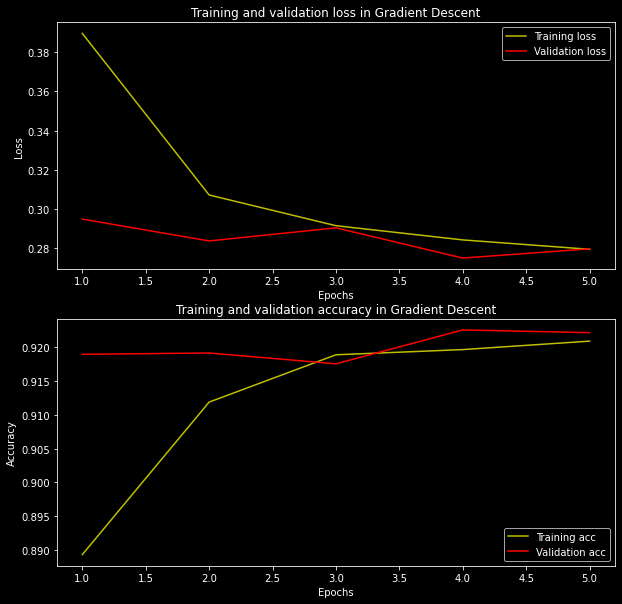

In [10]:
plot_loss_accuracy(history_gradient_descent,"Training and validation loss in Gradient Descent",
                   "Training and validation accuracy in Gradient Descent")

__Question 2__

In [6]:
from tensorflow.keras.layers import Dense
import tensorflow as tf
initializer = tf.keras.initializers.TruncatedNormal(mean=0., stddev=0.01)
bias = tf.keras.initializers.Constant(0.1)
adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)


In [10]:




mlp = tf.keras.Sequential([
    Dense(1500, activation='linear', input_shape=(784,),
            kernel_initializer=initializer,
            bias_initializer=bias,use_bias=True),
    Dense(1500, activation='relu',
            kernel_initializer=initializer,
            bias_initializer=bias,use_bias=True),
    Dense(1500, activation='relu',
            kernel_initializer=initializer,
            bias_initializer=bias,use_bias=True),
    Dense(10, activation='softmax',
            kernel_initializer=initializer,
            bias_initializer=bias,use_bias=True),
])

mlp.compile(
  optimizer=adam,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1500)              1177500   
_________________________________________________________________
dense_2 (Dense)              (None, 1500)              2251500   
_________________________________________________________________
dense_3 (Dense)              (None, 1500)              2251500   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                15010     
Total params: 5,695,510
Trainable params: 5,695,510
Non-trainable params: 0
_________________________________________________________________


In [11]:
history_adam = mlp.fit(X_train_r,yo_train, batch_size=100,
                    epochs=number_epochs(X_train_r,2e4), 
                    shuffle=True, validation_data=(X_test_r, yo_test))

Epoch 1/33
600/600 [==============================] - 124s 207ms/step - loss: 0.3088 - accuracy: 0.9039 - val_loss: 0.2155 - val_accuracy: 0.9332
Epoch 2/33
600/600 [==============================] - 124s 207ms/step - loss: 0.1532 - accuracy: 0.9525 - val_loss: 0.1444 - val_accuracy: 0.9556
Epoch 3/33
600/600 [==============================] - 125s 208ms/step - loss: 0.1157 - accuracy: 0.9649 - val_loss: 0.1129 - val_accuracy: 0.9651
Epoch 4/33
600/600 [==============================] - 125s 209ms/step - loss: 0.0987 - accuracy: 0.9705 - val_loss: 0.1039 - val_accuracy: 0.9700
Epoch 5/33
600/600 [==============================] - 127s 211ms/step - loss: 0.0827 - accuracy: 0.9751 - val_loss: 0.0972 - val_accuracy: 0.9723
Epoch 6/33
600/600 [==============================] - 126s 210ms/step - loss: 0.0741 - accuracy: 0.9776 - val_loss: 0.1314 - val_accuracy: 0.9681
Epoch 7/33
600/600 [==============================] - 126s 210ms/step - loss: 0.0725 - accuracy: 0.9789 - val_loss: 0.1139 -

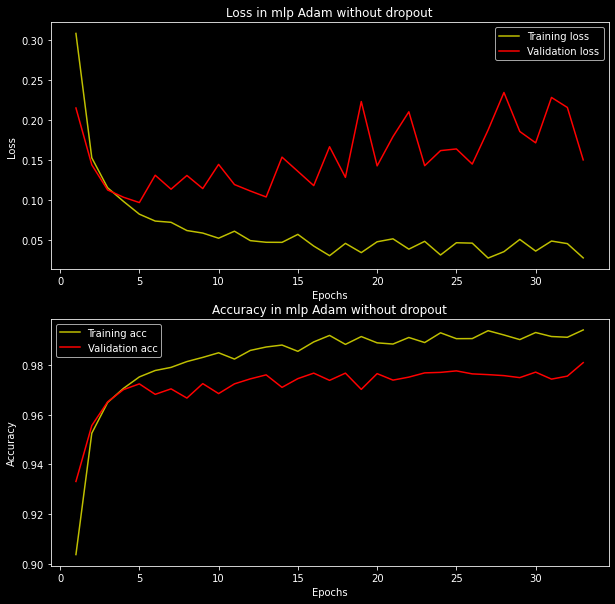

In [12]:
plot_loss_accuracy(history_adam,"Loss in mlp Adam without dropout",
                   "Accuracy in mlp Adam without dropout")

__Question 3__

In [7]:
from keras.layers import Dropout

mlp_drop = tf.keras.Sequential([
    Dense(1500, activation='relu', input_shape=(784,),
            kernel_initializer=initializer,
            bias_initializer=bias,use_bias=True),
    Dropout(0.5),
    Dense(1500, activation='relu',
            kernel_initializer=initializer,
            bias_initializer=bias,use_bias=True),
    Dropout(0.5),
    Dense(1500, activation='relu',
            kernel_initializer=initializer,
            bias_initializer=bias,use_bias=True),
    Dropout(0.5),
    Dense(10, activation='softmax',
            kernel_initializer=initializer,
            bias_initializer=bias,use_bias=True),
])

mlp_drop.compile(
  optimizer=adam,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

mlp_drop.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1500)              1177500   
_________________________________________________________________
dropout (Dropout)            (None, 1500)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1500)              2251500   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1500)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1500)              2251500   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1500)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1

In [8]:
history_adam_drop = mlp_drop.fit(X_train_r,yo_train, batch_size=100,
                    epochs=3, 
                    shuffle=True, validation_data=(X_test_r, yo_test))

Epoch 1/3
600/600 [==============================] - 101s 168ms/step - loss: 0.3016 - accuracy: 0.9031 - val_loss: 0.1300 - val_accuracy: 0.9606
Epoch 2/3
600/600 [==============================] - 117s 194ms/step - loss: 0.1544 - accuracy: 0.9553 - val_loss: 0.1059 - val_accuracy: 0.9693
Epoch 3/3
600/600 [==============================] - 119s 199ms/step - loss: 0.1322 - accuracy: 0.9627 - val_loss: 0.0918 - val_accuracy: 0.9722


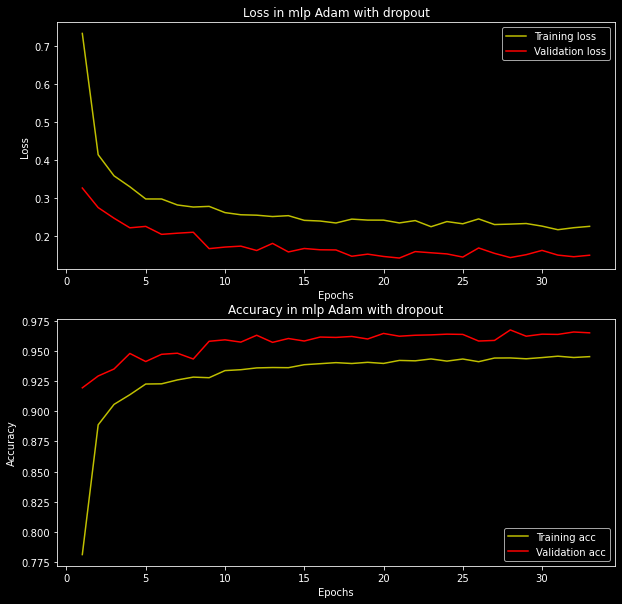

In [15]:
plot_loss_accuracy(history_adam_drop,"Loss in mlp Adam with dropout",
                   "Accuracy in mlp Adam with dropout")

__Question 4__

In [13]:
#reshape data to fit model
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

convolut = tf.keras.Sequential()

convolut.add(tf.keras.layers.Conv2D(32, 
                kernel_size=5, activation='relu', 
                kernel_initializer=initializer,
                bias_initializer=bias, strides = (1,1),
                input_shape = (28,28,1),padding="same"))

convolut.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
                            strides=(2, 2), padding='same'))
             
convolut.add(tf.keras.layers.Conv2D(64, 
                kernel_size=5, activation='relu', 
                kernel_initializer=initializer,
                bias_initializer=bias, strides = (1,1),padding="same"))

convolut.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
                            strides=(2, 2), padding='same'))

convolut.add(tf.keras.layers.Flatten())

convolut.add(tf.keras.layers.Dense(10, activation='softmax',
                kernel_initializer=initializer,
                bias_initializer=bias,use_bias=True))
             
convolut.compile(optimizer=adam ,loss='CategoricalCrossentropy',metrics=['accuracy'])
convolut.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                31370     
Total params: 83,466
Trainable params: 83,466
Non-trainable params: 0
__________________________________________________

In [14]:
history_convolut = convolut.fit(X_train,yo_train, batch_size=100, 
                    epochs=5, 
                    shuffle=True, validation_data=(X_test, yo_test))


Epoch 1/5
600/600 [==============================] - 162s 270ms/step - loss: 0.5506 - accuracy: 0.8226 - val_loss: 0.1902 - val_accuracy: 0.9437
Epoch 2/5
600/600 [==============================] - 136s 227ms/step - loss: 0.1784 - accuracy: 0.9469 - val_loss: 0.1442 - val_accuracy: 0.9556
Epoch 3/5
600/600 [==============================] - 135s 226ms/step - loss: 0.1373 - accuracy: 0.9591 - val_loss: 0.1098 - val_accuracy: 0.9682
Epoch 4/5
600/600 [==============================] - 167s 278ms/step - loss: 0.1156 - accuracy: 0.9658 - val_loss: 0.0911 - val_accuracy: 0.9731
Epoch 5/5
600/600 [==============================] - 134s 224ms/step - loss: 0.1052 - accuracy: 0.9692 - val_loss: 0.0839 - val_accuracy: 0.9749


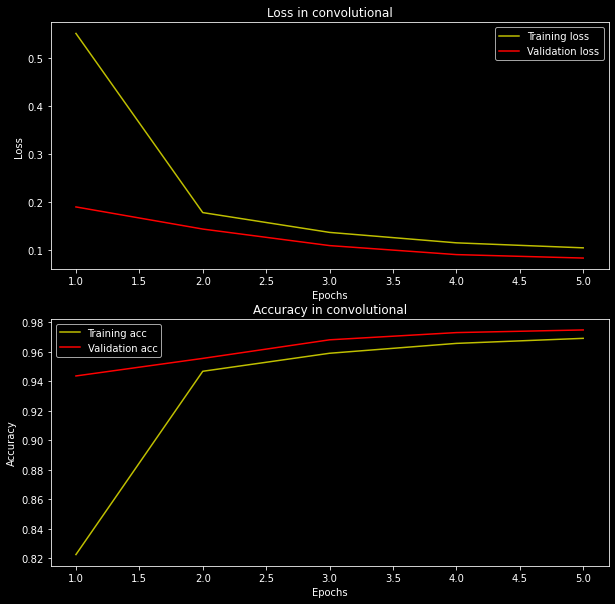

In [15]:
plot_loss_accuracy(history_convolut,"Loss in convolutional",
                   "Accuracy in convolutional")